In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 20 14:35:19 2018
@author: eric
"""

from IPython.display import display
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from io import StringIO
import pydotplus

#==============================================================================
#資料的前置處理
#==============================================================================
iris_dataset = datasets.load_iris() #讀取iris資料集

#iris_dataset說明：
#iris_dataset是一個類字典的結構，可以用[key]方式取值，iris_dataset裡面共有5個key，分別為
#'DESCR'：資料集說明文字(可略過)
#'data'：資料集樣本的特徵資料，其資料型態為ndarray
#'feature_names'：特徵的名字，資料型態為list
#'target'：資料集樣本的實際分類值，資料型態為ndarray
#'target_names'：分類值對應的iris種類名稱，資料型態為list

print("Feature names: \n{}" .format(iris_dataset['feature_names']))

#將資料(data與target)分成訓練集與測試集，切割比例為設定train_size為0.75(代表75%)、
#test_size為0.25%(代表25%)、random_state參數設定為0
X_train, X_test, y_train, y_test = train_test_split(**填入參數**)

print("X_train 的 (行數, 欄數): {}".format(X_train.shape))
print("y_train 的 (行數, 欄數): {}".format(y_train.shape))
print("X_test 的 (行數, 欄數): {}".format(X_test.shape))
print("y_test 的 (行數, 欄數): {}".format(y_test.shape))

#建立iris_dataframe，使用dataframe資料型態可以以表格的方式紀錄每一筆樣本的特徵資料
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

#繪出iris_dataframe的散佈矩陣圖
scatter_pic = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, 
                                         figsize=(15,15), marker='o', 
                                         hist_kwds={'bins':20})

#==============================================================================
#建立決策樹(最大樹)模型
#==============================================================================
#建立決策樹(最大樹)實例(資料型態：DecisionTreeClassifier)，初始化參數設定：
#分類方式(criterion)為entropy、最大深度(max_depth)為None、隨機狀態(random_state)為0
dt_max = **建立決策樹的實例**
**調用決策樹的適配方法(Hint:沒有回傳值)** #給定訓練資料讓模型進行配適

dt_max_training_acc = **調用決策樹計算準確度的方法(訓練)**#計算配適的準確率(預測訓練資料的準確度)
dt_max_testing_acc = **調用決策樹計算準確度的方法(測試)**#計算預測測試資料的準確度
print("Accuaracy on training set: {:.3f}".format(dt_max_training_acc))
print("Accuaracy on testing set: {:.3f}".format(dt_max_testing_acc))


print("最大樹：")
#以下是繪出最大樹的樹狀圖
dot_data = StringIO()
export_graphviz(dt_max, out_file=dot_data, 
                feature_names=iris_dataset.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))#顯示最大樹樹狀圖


#以下是計算最大樹在不同最大深度設定下，預測訓練/測試集的準確度
training_accuracy= **建立空的循序容器以儲存不同深度下的訓練準確度**
testing_accuracy= **建立空的循序容器以儲存不同深度下的測試準確度**
max_depth_setting = **建立可迭代物件，此物件包含1到10的整數** #最大深度從1到10
for i **迭代範圍設定**: #執行迴圈
    #建立決策樹，初始化參數設定最大深度(max_depth)為i、隨機狀態(random_state)為0
    clf = **建立決策樹實例**
    **調用決策樹的適配方法(Hint:沒有回傳值)**
    **在training_accuracy中新增此次迭代建立的模型的訓練準確度**
    **在training_accuracy中新增此次迭代建立的模型的測試準確度**


#以下是繪出上面計算的訓練/測試集準確度折線圖
plt.figure(2,figsize=(10,6))#建立figure
plt.plot(max_depth_setting, training_accuracy, label="training accuracy")#加入訓練集準確度折線圖
plt.plot(max_depth_setting, testing_accuracy, label="testing accuracy")#加入測試集準確度折線圖
plt.ylabel("Accuracy")#加入y軸的lable
plt.xlabel("n_max_depths")#加入x軸的lable
plt.legend()#加入圖例
plt.show()#顯示折線圖


#==============================================================================
#建立決策樹(最佳樹)模型
#==============================================================================
#建立決策樹(最佳樹)實例，參數設定為分類方式(criterion)為entropy、最大深度(max_depth)為3
#隨機狀態(random_state)為0
dt_best = **建立決策樹的實例**
**調用決策樹的適配方法(Hint:沒有回傳值)** #給定訓練資料讓模型進行配適


dt_best_training_acc = **調用決策樹計算準確度的方法(訓練)**#計算配適的準確率(預測訓練資料的準確度)
dt_best_testing_acc = **調用決策樹計算準確度的方法(測試)**#計算預測測試資料的準確度
print("Accuaracy on training set: {:.3f}".format(dt_best_training_acc))
print("Accuaracy on testing set: {:.3f}".format(dt_best_testing_acc))


print("最佳樹:")
#以下是繪出最大樹的樹狀圖
dot_data = StringIO()
export_graphviz(dt_best, out_file=dot_data, 
                feature_names=iris_dataset.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))


#==============================================================================
#比較最大樹與最佳樹的模型
#==============================================================================
#建立一個字典，字典裡面有'訓練'與'測試'兩個key，key對應的資料為一個list，
#'訓練'的key對應的list裡面依序放最大樹的訓練準確度與最佳樹的訓練準確度(注意順序不可相反)
#'測試'的key對應的list裡面依序放最大樹的測試準確度與最佳樹的測試準確度(注意順序不可相反)
model_comparison = {**填入鍵值與資料**}
result = pd.DataFrame(model_comparison, index=['最大樹', '最佳樹'])
print(result)



SyntaxError: invalid syntax (<ipython-input-1-0912a8c8bcf4>, line 34)

In [17]:
from IPython.display import display
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from io import StringIO
import pydotplus

iris_dataset = datasets.load_iris()
print(iris_dataset)



{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [18]:
from IPython.display import display
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from io import StringIO
import pydotplus

breast_cancer_dataset = datasets.load_breast_cancer()
print(breast_cancer_dataset)



{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

(3.8, 8.400000000000004)

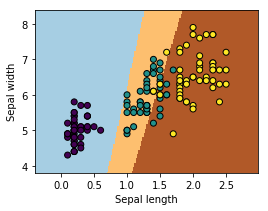

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 17 15:13:33 2021

@author: USER
"""

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets


iris = datasets.load_iris()

X = iris.data[:,[3,0]]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# de註解以
#plt.xticks(())
#plt.yticks(())

#plt.show()

# 跑abnormal data經常會overfitting

[[-0.4  -0.38 -0.36 ...  2.94  2.96  2.98]
 [-0.4  -0.38 -0.36 ...  2.94  2.96  2.98]
 [-0.4  -0.38 -0.36 ...  2.94  2.96  2.98]
 ...
 [-0.4  -0.38 -0.36 ...  2.94  2.96  2.98]
 [-0.4  -0.38 -0.36 ...  2.94  2.96  2.98]
 [-0.4  -0.38 -0.36 ...  2.94  2.96  2.98]]
[[3.8  3.8  3.8  ... 3.8  3.8  3.8 ]
 [3.82 3.82 3.82 ... 3.82 3.82 3.82]
 [3.84 3.84 3.84 ... 3.84 3.84 3.84]
 ...
 [8.36 8.36 8.36 ... 8.36 8.36 8.36]
 [8.38 8.38 8.38 ... 8.38 8.38 8.38]
 [8.4  8.4  8.4  ... 8.4  8.4  8.4 ]]


(3.8, 8.400000000000004)

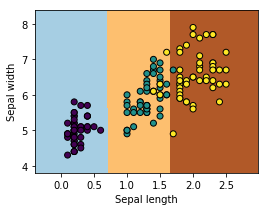

In [5]:


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets


iris = datasets.load_iris()

X = iris.data[:,[3,0]]  # we only take the first two features.
Y = iris.target

# Create an instance of SVM Classifier and fit the data.
svm=SVC(kernel='linear')
svm.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
print(xx)
print(yy)
# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

#plt.show()